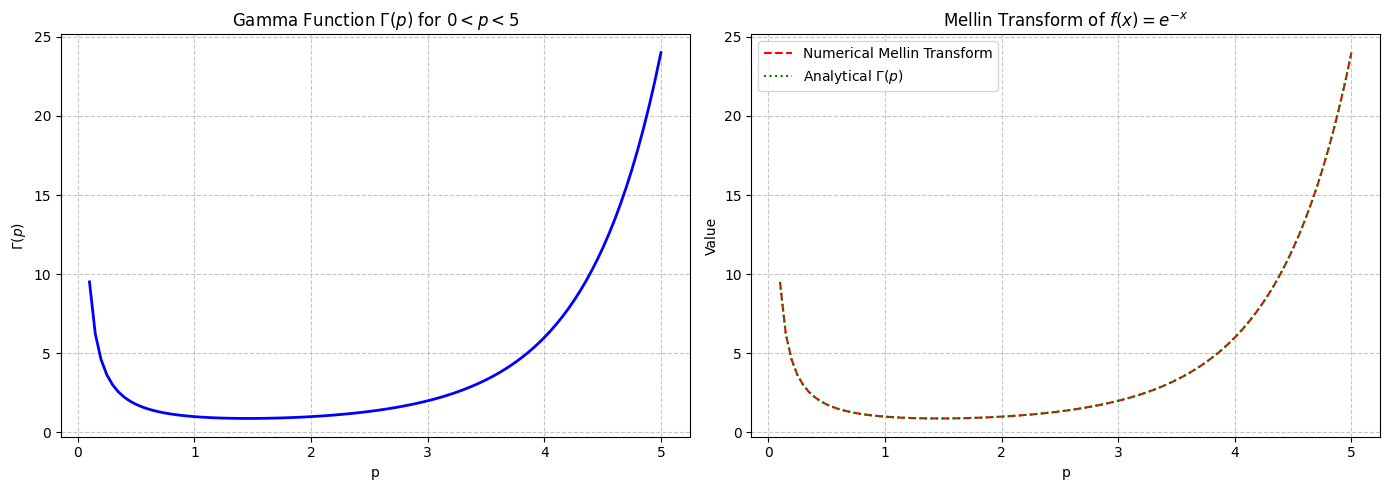

In [ ]:
import numpy as np
import scipy.integrate as integrate
from scipy.special import gamma
import matplotlib.pyplot as plt

# Define Mellin transform for f(x) = e^(-x)
def mellin_transform(f, p):
    return integrate.quad(lambda x: x**(p-1) * f(x), 0, np.inf)[0]

# Define the exponential function
def f(x):
    return np.exp(-x)

# Generate p values (avoid p=0 due to gamma function pole)
p_values = np.linspace(0.1, 5, 100)

# Compute values
gamma_vals = gamma(p_values)
mt_vals = [mellin_transform(f, p) for p in p_values]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot gamma function
ax1.plot(p_values, gamma_vals, 'b-', linewidth=2)
ax1.set_title(r'Gamma Function $\Gamma(p)$ for $0 < p < 5$')
ax1.set_xlabel('p')
ax1.set_ylabel(r'$\Gamma(p)$')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot Mellin transform vs analytical solution
ax2.plot(p_values, mt_vals, 'r--', label='Numerical Mellin Transform')
ax2.plot(p_values, gamma_vals, 'g:', label=r'Analytical $\Gamma(p)$')
ax2.set_title(r'Mellin Transform of $f(x) = e^{-x}$')
ax2.set_xlabel('p')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

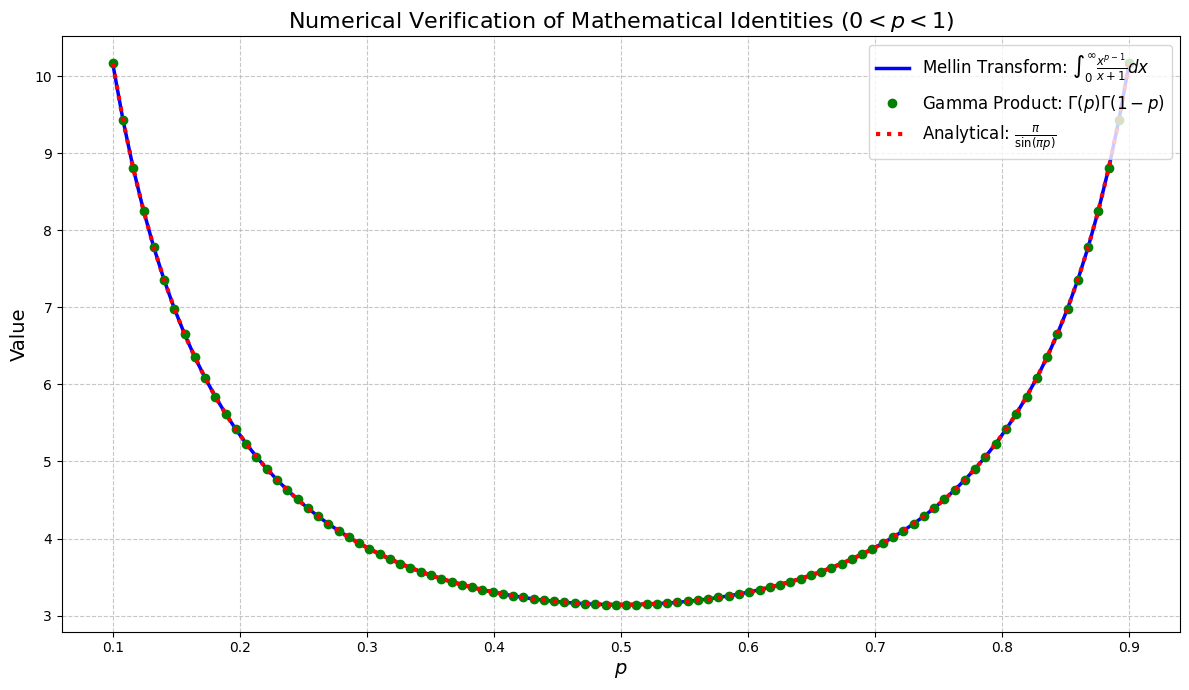

In [17]:
# ======================================================================
# Configuration
# ======================================================================
def f(x):
    return 1 / (x + 1)

p_values = np.linspace(0.1, 0.9, 100)  # Common p-range

# ======================================================================
# Computations
# ======================================================================
# Compute Mellin transform numerically
mt_values = [integrate.quad(lambda x: x**(p-1)*f(x), 0, np.inf, limit=1000)[0] 
             for p in p_values]

# Compute gamma product numerically
gamma_product = gamma(p_values) * gamma(1 - p_values)

# Analytical solution (common to both)
analytical = np.pi / np.sin(np.pi * p_values)

# ======================================================================
# Unified Plot
# ======================================================================
plt.figure(figsize=(12, 7))

# Plot Mellin transform results
plt.plot(p_values, mt_values, 'b-', linewidth=2.5, 
         label=r'Mellin Transform: $\int_0^\infty \frac{x^{p-1}}{x+1}dx$')

# Plot gamma product results
plt.plot(p_values, gamma_product, 'go', linewidth=2.5, 
         label=r'Gamma Product: $\Gamma(p)\Gamma(1-p)$')

# Plot analytical solution
plt.plot(p_values, analytical, 'r:', linewidth=3, 
         label=r'Analytical: $\frac{\pi}{\sin(\pi p)}$')

# Formatting
plt.xlabel('$p$', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Numerical Verification of Mathematical Identities ($0 < p < 1$)', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

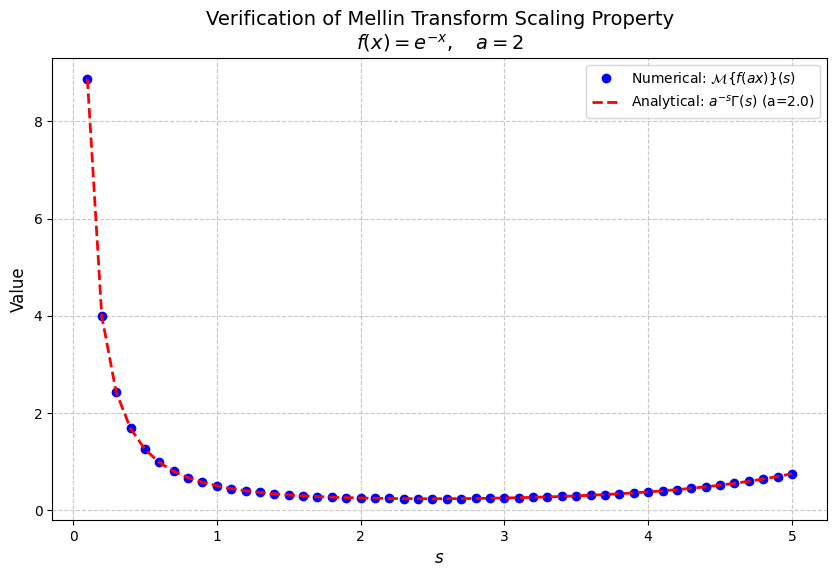

In [18]:
# Define the Mellin transform function
def mellin_transform(f, s):
    """Compute the Mellin transform of f at parameter s."""
    result, _ = integrate.quad(lambda x: x**(s - 1) * f(x), 0, np.inf)
    return result

# Define the original function f(x) = e^{-x}
def f(x):
    return np.exp(-x)

# Define the scaled function f(ax) = e^{-a x}
def f_scaled(x, a):
    return np.exp(-a * x)

# Parameters
a = 2.0  # Scaling factor
s_values = np.linspace(0.1, 5, 50)  # Avoid s <= 0

# Compute Mellin transforms
# Original function (f(x) = e^{-x})
mt_original = np.array([mellin_transform(f, s) for s in s_values])

# Scaled function (f(ax) = e^{-a x})
mt_scaled_numerical = np.array([mellin_transform(lambda x: f_scaled(x, a), s) 
                              for s in s_values])

# Analytical scaled result: a^{-s} * Γ(s)
mt_scaled_analytical = a**(-s_values) * gamma(s_values)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(s_values, mt_scaled_numerical, 'bo', markersize=6, 
         label='Numerical: $\mathcal{M}\{f(a x)\}(s)$')
plt.plot(s_values, mt_scaled_analytical, 'r--', lw=2, 
         label=f'Analytical: $a^{{-s}}\Gamma(s)$ (a={a})')
plt.xlabel('$s$', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Verification of Mellin Transform Scaling Property\n' 
          r'$f(x) = e^{-x},\quad a = 2$', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()